## Devoir de prediction des prix des maisons en utilisant le machine learning 

**MERAD Khedoudja Rym**

**IA Cheffe de projet IA specialité data science**

**M2 E-learning**

## Import des bibliothèques communes

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

## Import des données 

In [60]:
donnees = pd.read_csv("Data/Data_clean.csv")
print(donnees.head())


   Unnamed: 0  Avg. Area Income  Avg. Area House Age  \
0           0      79545.458574             5.682861   
1           1      79248.642455             6.002900   
2           2      61287.067179             5.865890   
3           3      63345.240046             7.188236   
4           4      59982.197226             5.040555   

   Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population  \
0                   7.009188                          4.09     23086.800503   
1                   6.730821                          3.09     40173.072174   
2                   8.512727                          5.13     36882.159400   
3                   5.586729                          3.26     34310.242831   
4                   7.839388                          4.23     26354.109472   

          Price                                            Address  
0  1.059034e+06  208 Michael Ferry Apt. 674 Laurabury, NE 37010...  
1  1.505891e+06  188 Johnson Views Suite 079 Lake 

## Analyse de données

C:\Users\rymkm\AppData\Local\Temp\ipykernel_5616\2075300464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = donnees.corr()


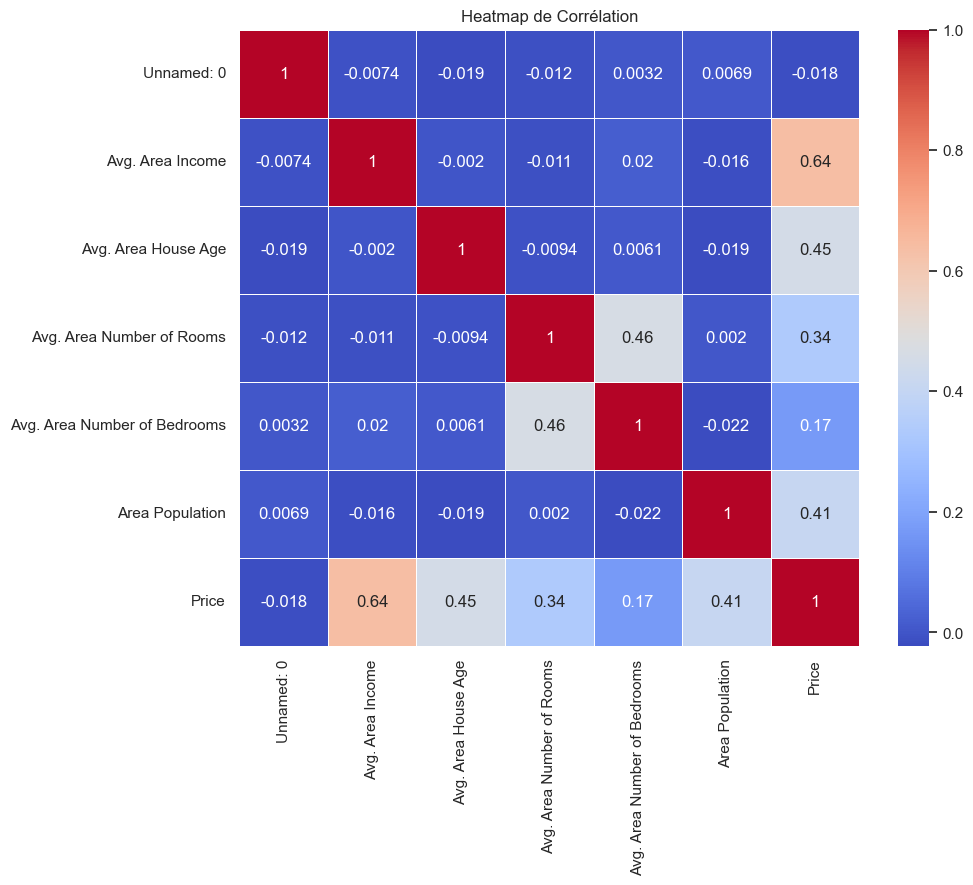

In [61]:
#Afficher la matrice de correlations
matrice_correlation = donnees.corr()
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap de Corrélation')
plt.show()

## Prediction par la methode de regression multiple

### Separer target et features ici la target est le prix des maisons

En ne gardant que les colonnes pertinentes corrélées avec le prix 
j'ai retiré le nombre de chambres et le nombre de chambres à coucher afin d'aleger le programme et de rendre la prediction plus pertinente car elles avaient des corrélations basses avec le prix (<0.5)

In [62]:
# Séparer les features (X) et la variable cible (y)
x = donnees[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]
y = donnees['Price']


Voir la distribution des données 

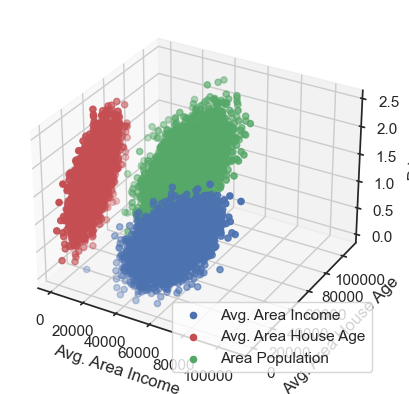

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['Avg. Area Income'], x['Avg. Area House Age'], y, label='Avg. Area Income')
ax.scatter(x['Avg. Area House Age'], x['Area Population'], y, c='r', label='Avg. Area House Age')
ax.scatter(x['Area Population'], x['Avg. Area Income'], y, c='g', label='Area Population')

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')

plt.legend()
plt.show()


S'assurer du shape et faire un reshape de y

In [104]:
#s'assurer du shape
print(x.shape)
print(y.shape)

(5000, 3)
(5000, 1)


In [65]:
#Faire un reshape de y
y = y.values.reshape(-1, 1)
print(y.shape)


(5000, 1)


#### Definir la matrice X

In [66]:
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:5])

(5000, 4)
[[7.95454586e+04 5.68286132e+00 2.30868005e+04 1.00000000e+00]
 [7.92486425e+04 6.00289981e+00 4.01730722e+04 1.00000000e+00]
 [6.12870672e+04 5.86588984e+00 3.68821594e+04 1.00000000e+00]
 [6.33452400e+04 7.18823609e+00 3.43102428e+04 1.00000000e+00]
 [5.99821972e+04 5.04055452e+00 2.63541095e+04 1.00000000e+00]]


#### Definir Theta

In [137]:
theta = np.random.randn(4, 1)
print(theta)


[[-2.12956709]
 [-0.66610851]
 [-0.84028933]
 [ 0.09032523]]


### Definir les méthodes 

#### definir le modele

In [138]:
def model(X,theta):
  return X.dot(theta)

#### Definir le cout 

In [139]:
def cost_function(X,y,theta):
  m =len(y)
  return 1/(2*m) * np.sum((model(X,theta) - y)**2)

#### Definir la methode du gradient 
**alpha**: Learning rate

In [148]:
def gradient_descent(X,y,theta, alpha,n_iterations):
  cost_history = np.zeros(n_iterations)
  for i in range(0,n_iterations):
    theta = theta - alpha
    cost_history[i] = cost_function(X,y,theta)
  return theta,cost_history

#### L'indice de performance

In [149]:
def coef_determination(y,pred):
  u = ((y-pred)**2).sum()
  v = ((y-y.mean())**2).sum()
  return 1- u/v

### Train test 

In [150]:
n_iterations = 10000
alpha = 0.01
theta_final, cost_history = gradient_descent(X,y,theta,alpha,n_iterations)

In [151]:
predictions = model(X,theta_final)

tracer les predictions et les données réelles 

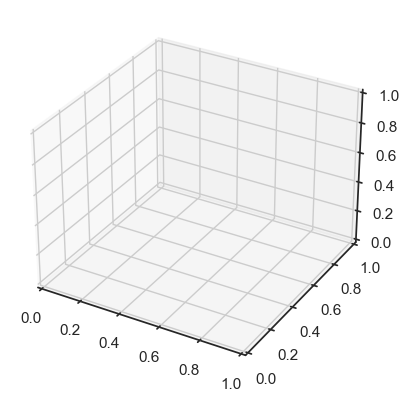

In [152]:
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')



Droite d'apprentissage

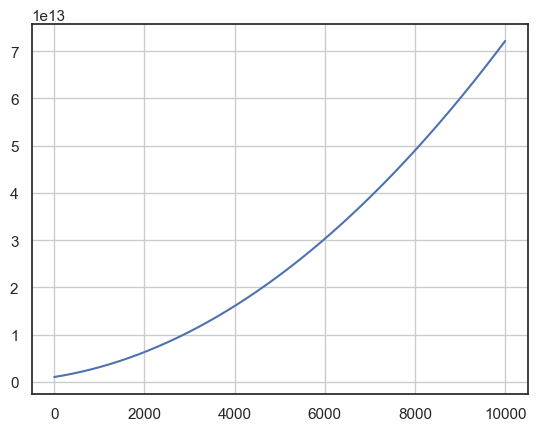

In [153]:
plt.plot(range(n_iterations),cost_history)
plt.grid()

Performance du modèle

In [154]:
coef_determination(y,predictions)

-1156.3419275781753